In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
# Load data from CSV files into Pandas dataframes
customer_df = pd.read_csv('customers.csv')
usage_df = pd.read_csv('usage.csv')

In [3]:
# Explore data
print("Customer data:")
print(customer_df.head())
print("\nUsage data:")
print(usage_df.head())

Customer data:
   Customer_ID Customer_Name       Plan Signup_Date First_Charge_Date  \
0         1234          John  Streaming  12/25/2013         1/23/2014   
1         2345          Jane       Mail  12/23/2013               NaN   
2         3456           Sam       Both  12/24/2013               NaN   
3         4567       Kristal       Both  12/25/2013         1/24/2014   
4         5678          Erin  Streaming  12/24/2013         1/23/2014   

  Cancel_Date Channel  
0   3/29/2014     PPC  
1         NaN     SEO  
2         NaN  Direct  
3         NaN  Direct  
4         NaN     PPC  

Usage data:
   Customer_ID Movie_Name Movie_Genre  Movie_Length        Start_Time  \
0         1234      Shrek        Kids          2.52  12/31/2013 13:33   
1         2345   The Ring      Horror          3.00    1/6/2014 17:22   
2         1122  Anchorman      Comedy          3.63    1/2/2014 17:38   
3         4567         Up        Kids          3.33    1/6/2014 21:38   
4         2345   Die Har

In [4]:
# Factor 1: Movie Metrics
# Calculate total views of the Netflix Original movie
total_views = usage_df[usage_df['Movie_Name'] == 'Netflix Original Movie']['Customer_ID'].nunique()

# Factor 2: Customer Segmentation
# Segment customers based on the plan
plan_segmentation = customer_df.groupby('Plan')['Customer_ID'].count()

# Factor 3: Temporal Analysis
# Analyze peak viewing hours and days
usage_df['Start_Time'] = pd.to_datetime(usage_df['Start_Time'])
usage_df['Hour'] = usage_df['Start_Time'].dt.hour
peak_hours = usage_df['Hour'].value_counts().sort_index()
peak_days = usage_df['Start_Time'].dt.day_name().value_counts()

# Factor 5: Marketing and Promotions
# Analyze the effectiveness of marketing channels
channel_metrics = customer_df.groupby('Channel')['Customer_ID'].count()

In [5]:
# Metrics to Track
# Calculate average viewership duration
average_duration = usage_df['Movie_Length'].mean()

# Intended Impact
print("\nIntended Impact:")
print(f"Total Views of Netflix Original Movie: {total_views}")
print("\nCustomer Segmentation:")
print(plan_segmentation)
print("\nPeak Viewing Hours:")
print(peak_hours)
print("\nPeak Viewing Days:")
print(peak_days)
print("\nMarketing Channel Metrics:")
print(channel_metrics)
print("\nAverage Viewership Duration:")
print(f"{average_duration:.2f} hours")


Intended Impact:
Total Views of Netflix Original Movie: 0

Customer Segmentation:
Plan
Both         6
Mail         5
Streaming    7
Name: Customer_ID, dtype: int64

Peak Viewing Hours:
1     1
2     2
6     2
9     1
13    1
17    4
19    1
20    1
21    2
22    2
Name: Hour, dtype: int64

Peak Viewing Days:
Monday       4
Sunday       4
Thursday     3
Wednesday    3
Tuesday      2
Friday       1
Name: Start_Time, dtype: int64

Marketing Channel Metrics:
Channel
Direct    7
PPC       6
SEO       5
Name: Customer_ID, dtype: int64

Average Viewership Duration:
3.14 hours


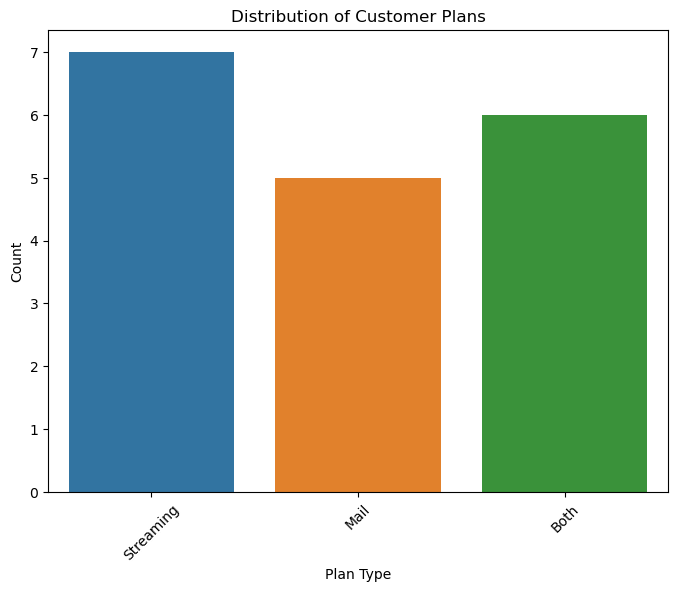

In [6]:
# Plot the distribution of customer plans
plt.figure(figsize=(8, 6))
sns.countplot(data=customer_df, x='Plan')
plt.title('Distribution of Customer Plans')
plt.xlabel('Plan Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

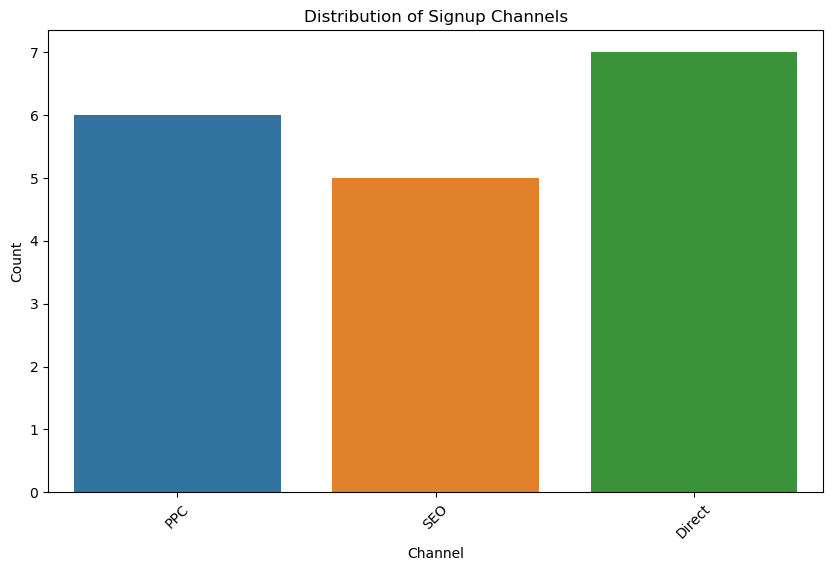

In [7]:
# Plot the distribution of marketing channels
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_df, x='Channel')
plt.title('Distribution of Signup Channels')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

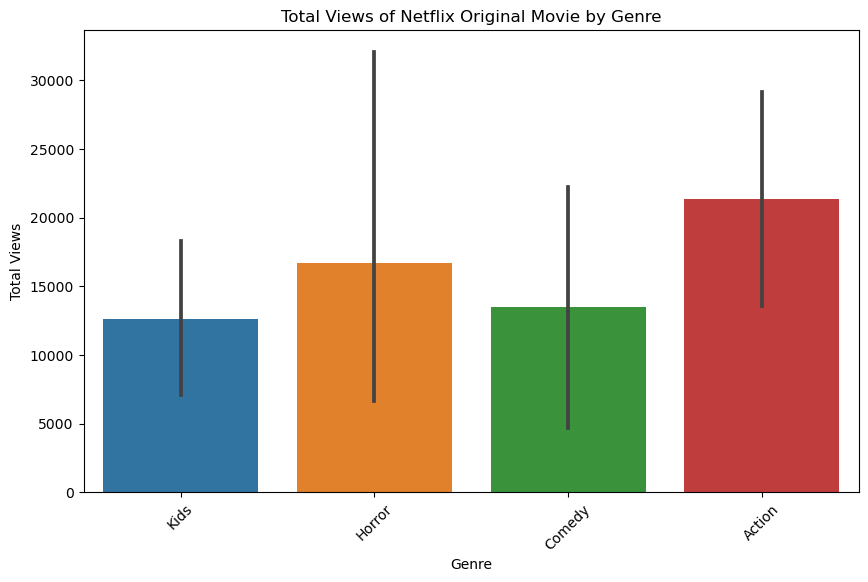

In [8]:
# Plot the total views of the Netflix Original movie by genre
plt.figure(figsize=(10, 6))
sns.barplot(data=usage_df, x='Movie_Genre', y='Customer_ID', estimator=sum)
plt.title('Total Views of Netflix Original Movie by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Views')
plt.xticks(rotation=45)
plt.show()

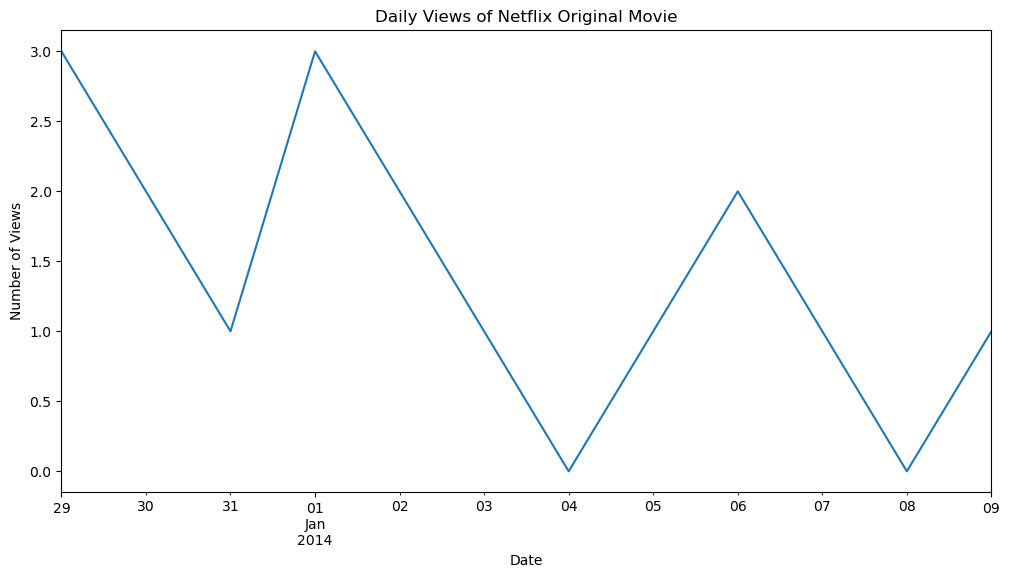

In [10]:
# Create a line chart to show daily viewership trends
usage_df['Start_Time'] = pd.to_datetime(usage_df['Start_Time'])
daily_views = usage_df.resample('D', on='Start_Time')['Customer_ID'].count()
plt.figure(figsize=(12, 6))
daily_views.plot()
plt.title('Daily Views of Netflix Original Movie')
plt.xlabel('Date')
plt.ylabel('Number of Views')
plt.show()

In [11]:
# Create a heatmap to visualize peak viewing hours by day of the week
hourly_views = usage_df.groupby([usage_df.index.day_name(), usage_df.index.hour])['Customer_ID'].count().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(hourly_views, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.title('Peak Viewing Hours by Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

AttributeError: 'RangeIndex' object has no attribute 'day_name'

In [ ]:
# Convert 'Start_Time' to datetime and set it as the index
usage_df['Start_Time'] = pd.to_datetime(usage_df['Start_Time'])
usage_df.set_index('Start_Time', inplace=True)

# Group usage data by day and count the number of views each day
daily_views = usage_df['Movie_Name'].resample('D').count()

# Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(daily_views)
plt.title('Daily Views of Netflix Original Movie')
plt.xlabel('Date')
plt.ylabel('Number of Views')
plt.show()

# Plot ACF and PACF to determine ARIMA parameters
plot_acf(daily_views)
plt.title('Autocorrelation Function')
plt.show()

plot_pacf(daily_views)
plt.title('Partial Autocorrelation Function')
plt.show()

# Fit an ARIMA model to the data
model = ARIMA(daily_views, order=(1, 1, 1))
model_fit = model.fit()

# Forecast future views
forecast_steps = 30  # Number of days to forecast
forecast, stderr, conf_int = model_fit.forecast(steps=forecast_steps)

# Visualize the forecasted views
plt.figure(figsize=(12, 6))
plt.plot(daily_views, label='Observed')
plt.plot(pd.date_range(start=daily_views.index[-1], periods=forecast_steps, freq='D'), forecast, label='Forecast', color='orange')
plt.fill_between(pd.date_range(start=daily_views.index[-1], periods=forecast_steps, freq='D'), conf_int[:, 0], conf_int[:, 1], color='lightgray', alpha=0.7)
plt.title('Daily Views of Netflix Original Movie (Forecast)')
plt.xlabel('Date')
plt.ylabel('Number of Views')
plt.legend()
plt.show()
